In [1]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# <p style="color: #6c89c6;">Работу выполнил: Таратин Артём ПМ22-1</p>

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
y.shape, X.shape

((768,), (768, 8))

In [7]:
logistic = LogisticRegression()
logistic.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725233695006017
Glucose 0.03359996459130423
BloodPressure -0.014087345062317822
SkinThickness -0.0012704383430185225
Insulin -0.0012403283598499935
BMI 0.0772022059648674
DiabetesPedigreeFunction 1.4190420682135558
Age 0.01003525206409385


In [9]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70292394]


In [10]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [11]:
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

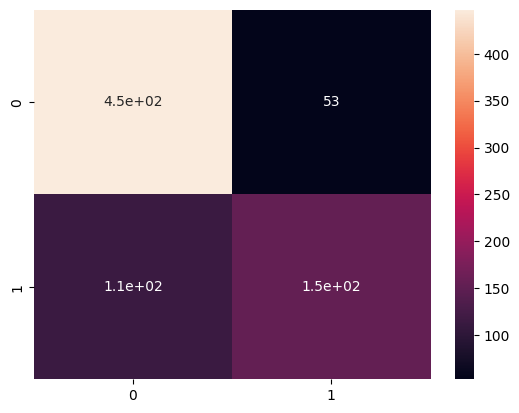

In [12]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [13]:
logistic.score(X, y)

0.7825520833333334

In [14]:
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [15]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

1. `classes_`: Массив уникальных классов, обнаруженных при обучении.
2. `n_iter_`: Количество итераций, выполненных для сходимости.
---
1. `penalty`: Указывает на тип регуляризации. Разные значения (`'l1'`, `'l2'`, `'elasticnet'`, `'none'`) могут влиять на производительность, особенно при наличии переобучения или мультиколлинеарности признаков.
2. `C`: Обратная сила регуляризации. Меньшие значения указывают на более сильную регуляризацию, что может помочь снизить переобучение, но также может привести к недостаточной подгонке.
3. `max_iter`: Максимальное количество итераций, принимаемых алгоритмом для сходимости.
4. `solver`: Алгоритм оптимизации. Разные решатели (`'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, `'saga'`) могут работать лучше для различных типов данных и конфигураций.
5. `class_weight`: Веса для балансировки классов в случае несбалансированных наборов данных.

In [16]:
polynomial.classes_, polynomial.n_iter_

(array([0, 1]), array([100], dtype=int32))

# 2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

## I. Метод опорных векторов

### * С линейным ядром

In [18]:
from sklearn.svm import SVC

In [19]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(model.score(X_test, y_test))

[[89 10]
 [24 31]]
0.7792207792207793


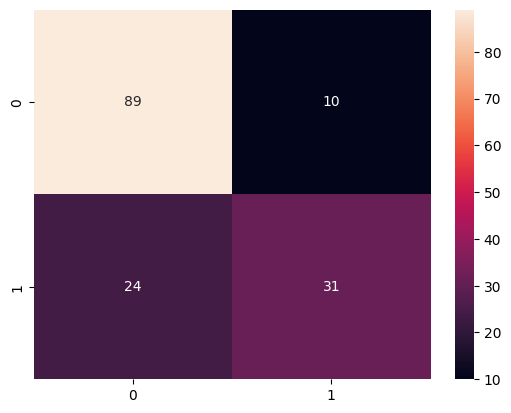

In [20]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

### * С гауссовым ядром

In [21]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(model.score(X_test, y_test))

[[93  6]
 [27 28]]
0.7857142857142857


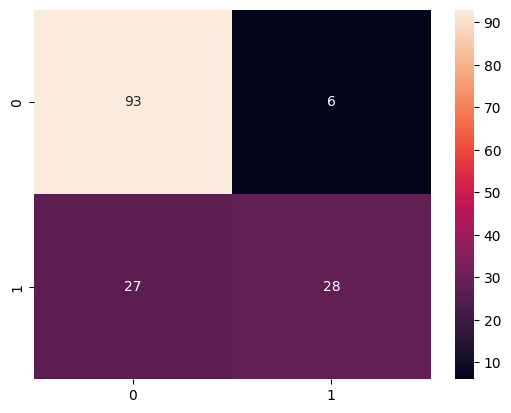

In [22]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

### * С полиномиальным ядром

In [23]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(model.score(X_test, y_test))

[[95  4]
 [30 25]]
0.7792207792207793


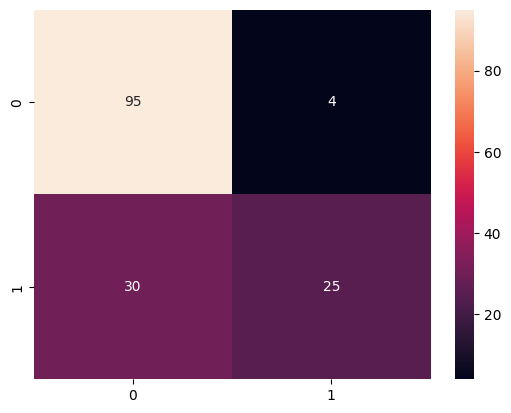

In [24]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# II. Метод ближайших соседей

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(model.score(X_test, y_test))

[[90  9]
 [24 31]]
0.7857142857142857


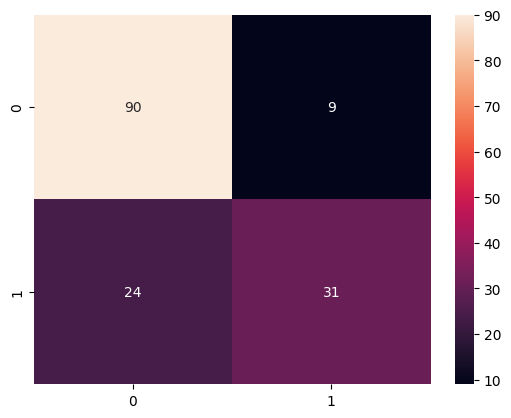

In [27]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

## III. Многослойный перцептрон

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
model = MLPClassifier(hidden_layer_sizes=(1000,100,), activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(model.score(X_test, y_test))

[[96  3]
 [33 22]]
0.7662337662337663


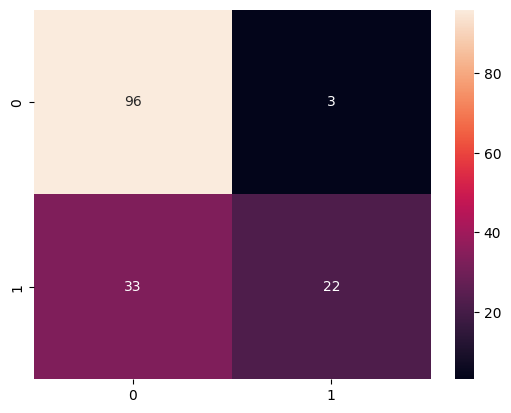

In [30]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

## IV. Дерево решений

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(model.score(X_test, y_test))

[[78 21]
 [25 30]]
0.7012987012987013


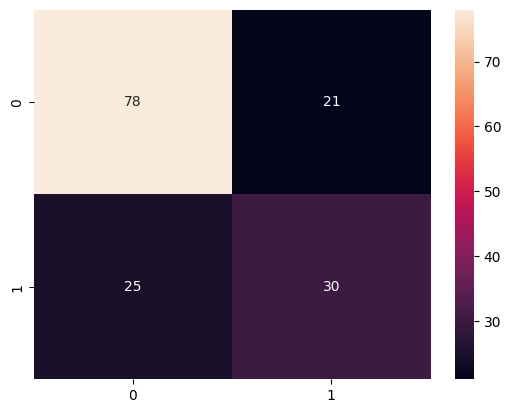

In [33]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

## V. Наивный байесовский классификатор

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(model.score(X_test, y_test))

[[85 14]
 [21 34]]
0.7727272727272727


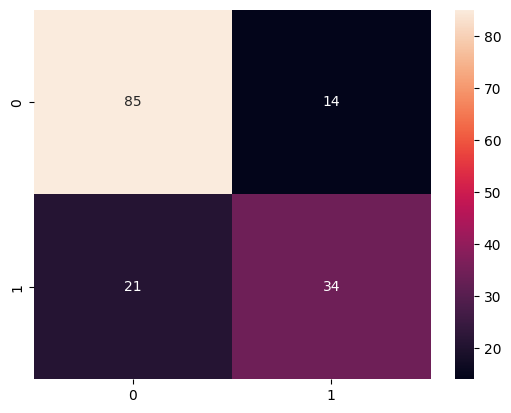

In [36]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# 3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [37]:
def fit_modeles(X, y):
    models = {
        "SVM": SVC(kernel='rbf'),
        "KNN": KNeighborsClassifier(),
        "MLP": MLPClassifier(hidden_layer_sizes=(1000,100,), max_iter=10000, activation='logistic'),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB()
    }

    for name, model in models.items():
        X_train, X_test, \
        y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"{name}: {accuracy}")

In [38]:
fit_modeles(X, y)

SVM: 0.7857142857142857
KNN: 0.7337662337662337


MLP: 0.6948051948051948
Decision Tree: 0.6883116883116883
Naive Bayes: 0.7727272727272727


# 4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [39]:
from sklearn.datasets import load_iris

In [40]:
iris = load_iris()

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
y = iris_df.species
X = iris_df.iloc[:, 0:4]
y.shape, X.shape

((150,), (150, 4))

In [42]:
fit_modeles(X, y)

SVM: 0.9666666666666667
KNN: 1.0
MLP: 1.0
Decision Tree: 0.9666666666666667
Naive Bayes: 0.9666666666666667
